In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("/content/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h2 style="color:purple">Data exploration and visualization</h2>

In [3]:
left = df[df.left==1]
left.shape

(3571, 10)

In [4]:
retained = df[df.left==0]
retained.shape

(11428, 10)

**Impact of salary on employee retention**

<Axes: xlabel='salary'>

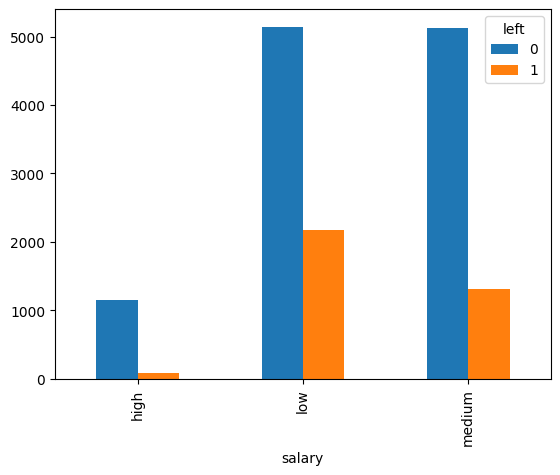

In [5]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

<Axes: xlabel='Department'>

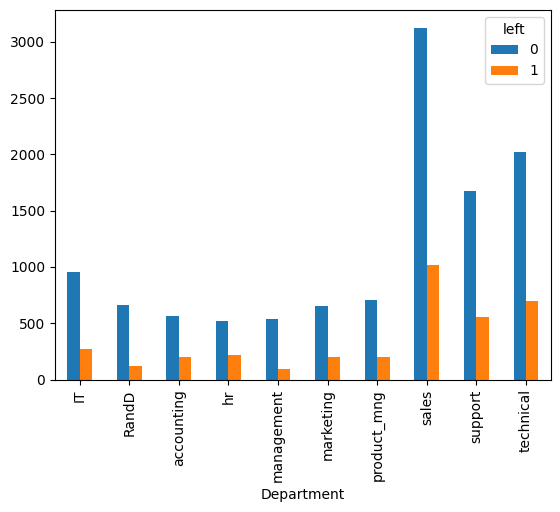

In [6]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [7]:
# Convert Salary to ordinal (numbers) because Low < Medium < High
salary_map = {'low': 1, 'medium': 2, 'high': 3}
df['salary_num'] = df['salary'].map(salary_map)

# One-Hot Encode Department (creates is_sales, is_technical, etc.)
df = pd.get_dummies(df, columns=['Department'], prefix='dept', drop_first=True)

In [8]:
# Select Features (Keep everything numeric except the old 'salary' text column)
# Notice we KEEP 'time_spend_company' and 'Work_accident' this time!
X = df.drop(['left', 'salary'], axis=1)
y = df['left']

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 3. Scaling (Critical for Logistic Regression)
# Logistic Regression treats "150 hours" as a huge number compared to "0.5 satisfaction"
# unless we scale them to the same range.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Correct Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:

# 5. Train Model with Class Weights
# 'class_weight="balanced"' helps the model pay extra attention to people leaving
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# 6. Professional Evaluation
y_pred = model.predict(X_test)

print("--- 📊 Retention Prediction Report ---")
print(classification_report(y_test, y_pred))

--- 📊 Retention Prediction Report ---
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2286
           1       0.51      0.80      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.78      3000



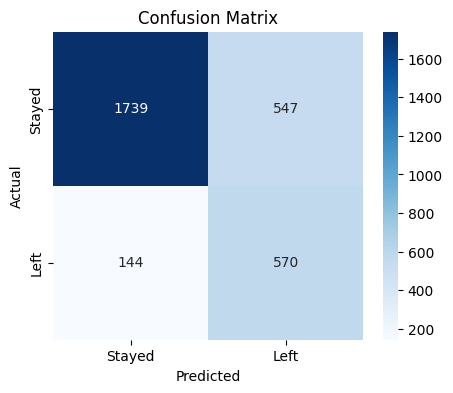

In [11]:


# Visual Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [12]:
# 7. Feature Importance (Why are they leaving?)
# Logistic Regression coefficients tell us which features drive the decision.
importance = pd.DataFrame({
    'Feature': X.columns,
    'Impact': model.coef_[0]
}).sort_values(by='Impact', ascending=False)

print("\n--- 🔍 Top Factors for Staying vs Leaving ---")
print(importance.head(5)) # Positive = Helps Retention, Negative = Drives Exit
print("\n", importance.tail(5))


--- 🔍 Top Factors for Staying vs Leaving ---
                 Feature    Impact
4     time_spend_company  0.686069
3   average_montly_hours  0.259676
1        last_evaluation  0.199618
16        dept_technical  0.126062
10               dept_hr  0.118376

                  Feature    Impact
6  promotion_last_5years -0.192331
7             salary_num -0.431607
2         number_project -0.526248
5          Work_accident -0.536347
0     satisfaction_level -1.106659


In [13]:
import joblib

# Save the trained model
joblib.dump(model, 'retention_model.pkl')
print("Model saved as retention_model.pkl")

Model saved as retention_model.pkl


In [14]:
joblib.dump(scaler, 'scaler.pkl')

# 6. Save Column Names (To ensure the app puts inputs in the right order)
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

print("✅ SUCCESS! All files created. You can now build the app.")

✅ SUCCESS! All files created. You can now build the app.
